import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

## Portfolio Project: Analysis of Airplane Flight Delays

This portfolio project involves an analysis of airline flight delay data. The dataset contains information related to multiple delays associated with airplane flights, such as carrier delays, weather-related delays, and more.



In [3]:
df = pd.read_csv('/Users/navneetwarraich/Downloads/airline_delay.csv')
df

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2020,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",44.0,3.0,1.63,0.00,...,0.0,1.25,0.0,1.0,89.0,56.0,0.0,3.0,0.0,30.0
1,2020,12,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",90.0,1.0,0.96,0.00,...,0.0,0.00,0.0,0.0,23.0,22.0,0.0,1.0,0.0,0.0
2,2020,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,8.0,5.75,0.00,...,0.0,0.65,0.0,1.0,338.0,265.0,0.0,45.0,0.0,28.0
3,2020,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",184.0,9.0,4.17,0.00,...,0.0,3.00,0.0,0.0,508.0,192.0,0.0,92.0,0.0,224.0
4,2020,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",76.0,11.0,4.78,0.00,...,0.0,1.00,1.0,0.0,692.0,398.0,0.0,178.0,0.0,116.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3346,2019,12,EV,ExpressJet Airlines LLC,AMA,"Amarillo, TX: Rick Husband Amarillo International",56.0,8.0,2.20,1.00,...,0.0,0.80,0.0,1.0,353.0,165.0,19.0,135.0,0.0,34.0
3347,2019,12,EV,ExpressJet Airlines LLC,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",76.0,17.0,7.51,0.24,...,0.0,5.12,0.0,0.0,1880.0,1516.0,25.0,200.0,0.0,139.0
3348,2019,12,EV,ExpressJet Airlines LLC,AUS,"Austin, TX: Austin - Bergstrom International",7.0,1.0,0.00,0.48,...,0.0,0.00,0.0,0.0,96.0,0.0,46.0,50.0,0.0,0.0
3349,2019,12,EV,ExpressJet Airlines LLC,AVL,"Asheville, NC: Asheville Regional",12.0,1.0,0.00,0.00,...,0.0,0.00,0.0,0.0,23.0,0.0,0.0,23.0,0.0,0.0


In [5]:
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2020,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",44.0,3.0,1.63,0.0,...,0.0,1.25,0.0,1.0,89.0,56.0,0.0,3.0,0.0,30.0
1,2020,12,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",90.0,1.0,0.96,0.0,...,0.0,0.00,0.0,0.0,23.0,22.0,0.0,1.0,0.0,0.0
2,2020,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,8.0,5.75,0.0,...,0.0,0.65,0.0,1.0,338.0,265.0,0.0,45.0,0.0,28.0
3,2020,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",184.0,9.0,4.17,0.0,...,0.0,3.00,0.0,0.0,508.0,192.0,0.0,92.0,0.0,224.0
4,2020,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",76.0,11.0,4.78,0.0,...,0.0,1.00,1.0,0.0,692.0,398.0,0.0,178.0,0.0,116.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3351 entries, 0 to 3350
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 3351 non-null   int64  
 1   month                3351 non-null   int64  
 2   carrier              3351 non-null   object 
 3   carrier_name         3351 non-null   object 
 4   airport              3351 non-null   object 
 5   airport_name         3351 non-null   object 
 6   arr_flights          3343 non-null   float64
 7   arr_del15            3343 non-null   float64
 8   carrier_ct           3343 non-null   float64
 9   weather_ct           3343 non-null   float64
 10  nas_ct               3343 non-null   float64
 11  security_ct          3343 non-null   float64
 12  late_aircraft_ct     3343 non-null   float64
 13  arr_cancelled        3343 non-null   float64
 14  arr_diverted         3343 non-null   float64
 15  arr_delay            3343 non-null   f

### Dropping the missing values of the data

In [25]:
df.dropna(axis=0, inplace=True)

### Printing the info after dropping the null values

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3343 entries, 0 to 3350
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 3343 non-null   int64  
 1   month                3343 non-null   int64  
 2   carrier              3343 non-null   object 
 3   carrier_name         3343 non-null   object 
 4   airport              3343 non-null   object 
 5   airport_name         3343 non-null   object 
 6   arr_flights          3343 non-null   float64
 7   arr_del15            3343 non-null   float64
 8   carrier_ct           3343 non-null   float64
 9   weather_ct           3343 non-null   float64
 10  nas_ct               3343 non-null   float64
 11  security_ct          3343 non-null   float64
 12  late_aircraft_ct     3343 non-null   float64
 13  arr_cancelled        3343 non-null   float64
 14  arr_diverted         3343 non-null   float64
 15  arr_delay            3343 non-null   f

In [8]:
arrdel_corr = df['arr_del15'].corr(df['arr_delay'])
carrier_corr = df['carrier_ct'].corr(df['arr_delay'])
weather_corr = df['weather_ct'].corr(df['arr_delay'])
lateAircraft_corr = df['late_aircraft_ct'].corr(df['arr_delay'])

print('arrdel_corr =', arrdel_corr)
print('carrier_corr =', carrier_corr)
print('weather_corr =', weather_corr)
print('lateAircraft_corr =', lateAircraft_corr)

arrdel_corr = 0.960249785068336
carrier_corr = 0.8518341533379142
weather_corr = 0.7319670313973214
lateAircraft_corr = 0.909199362062582


In [9]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder(dtype=int)

df["carriercode"] = ord_enc.fit_transform(df[['carrier']])

df["airportcode"] = ord_enc.fit_transform(df[['airport']])

df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,carriercode,airportcode
0,2020,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",44.0,3.0,1.63,0.0,...,0.0,1.0,89.0,56.0,0.0,3.0,0.0,30.0,0,0
1,2020,12,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",90.0,1.0,0.96,0.0,...,0.0,0.0,23.0,22.0,0.0,1.0,0.0,0.0,0,4
2,2020,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,8.0,5.75,0.0,...,0.0,1.0,338.0,265.0,0.0,45.0,0.0,28.0,0,11
3,2020,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",184.0,9.0,4.17,0.0,...,0.0,0.0,508.0,192.0,0.0,92.0,0.0,224.0,0,12
4,2020,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",76.0,11.0,4.78,0.0,...,1.0,0.0,692.0,398.0,0.0,178.0,0.0,116.0,0,13


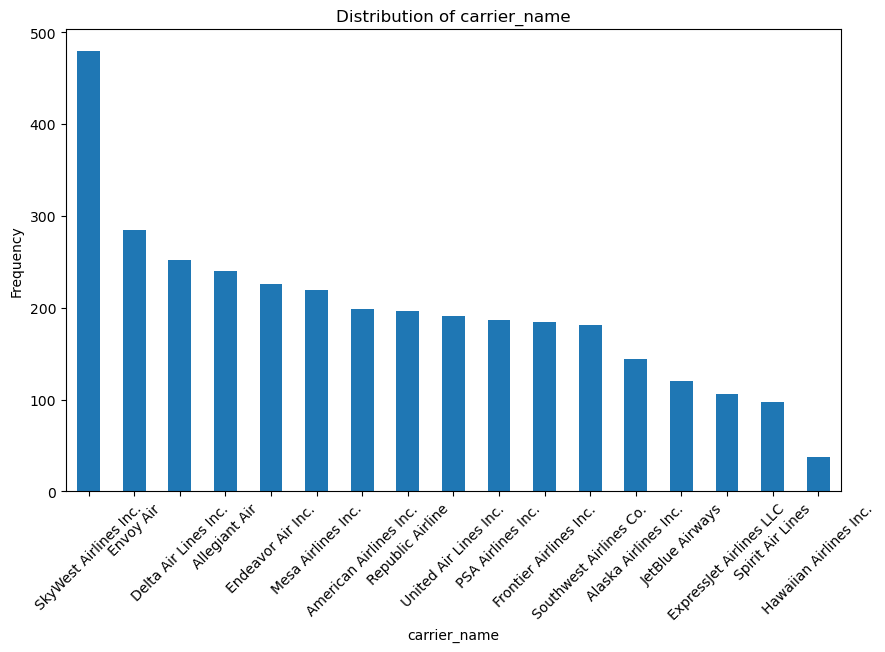

In [34]:
categorical_variable = 'carrier_name'

category_counts = df[categorical_variable].value_counts()

plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.xlabel(categorical_variable)
plt.ylabel('Frequency')
plt.title(f'Distribution of {categorical_variable}')
plt.xticks(rotation=45) 
plt.show()

From the graph above, it can be seen that the carrier SkyWest Airlines Inc has the highest frequency

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import RFE


In [43]:

data = pd.read_csv('/Users/navneetwarraich/Downloads/airline_delay.csv')

df



,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,carriercode,airportcode
0,2020,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",44.0,3.0,1.63,0.00,...,0.0,1.0,89.0,56.0,0.0,3.0,0.0,30.0,0,0
1,2020,12,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",90.0,1.0,0.96,0.00,...,0.0,0.0,23.0,22.0,0.0,1.0,0.0,0.0,0,4
2,2020,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,8.0,5.75,0.00,...,0.0,1.0,338.0,265.0,0.0,45.0,0.0,28.0,0,11
3,2020,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",184.0,9.0,4.17,0.00,...,0.0,0.0,508.0,192.0,0.0,92.0,0.0,224.0,0,12
4,2020,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",76.0,11.0,4.78,0.00,...,1.0,0.0,692.0,398.0,0.0,178.0,0.0,116.0,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3346,2019,12,EV,ExpressJet Airlines LLC,AMA,"Amarillo, TX: Rick Husband Amarillo International",56.0,8.0,2.20,1.00,...,0.0,1.0,353.0,165.0,19.0,135.0,0.0,34.0,5,16
3347,2019,12,EV,ExpressJet Airlines LLC,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",76.0,17.0,7.51,0.24,...,0.0,0.0,1880.0,1516.0,25.0,200.0,0.0,139.0,5,20
3348,2019,12,EV,ExpressJet Airlines LLC,AUS,"Austin, TX: Austin - Bergstrom International",7.0,1.0,0.00,0.48,...,0.0,0.0,96.0,0.0,46.0,50.0,0.0,0.0,5,23
3349,2019,12,EV,ExpressJet Airlines LLC,AVL,"Asheville, NC: Asheville Regional",12.0,1.0,0.00,0.00,...,0.0,0.0,23.0,0.0,0.0,23.0,0.0,0.0,5,24


In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [47]:
# Model A
model_A = LinearRegression()
X_train_A = df[['carrier_ct', 'weather_ct']]
y_train_A = df['arr_del15']
X_test_A = df[['carrier_ct', 'weather_ct']]
y_test_A = df['arr_del15']
model_A.fit(X_train_A, y_train_A)

# Model B
model_B = LinearRegression()
X_train_B = df[['carriercode', 'airportcode']]
y_train_B = df['arr_del15']
X_test_B = df[['carriercode', 'airportcode']]
y_test_B = df['arr_del15']
model_B.fit(X_train_B, y_train_B)

# Model C
model_C = LinearRegression()
X_train_C = df[['carrier_ct', 'weather_ct']]
y_train_C = df['arr_del15']
X_test_C = df[['carrier_ct', 'weather_ct']]
y_test_C = df['arr_del15']
model_C.fit(X_train_C, y_train_C)

# Model D
model_D = LinearRegression()
X_train_D = df[['carriercode', 'airportcode']]
y_train_D = df['arr_del15']
X_test_D = df[['carriercode', 'airportcode']]
y_test_D = df['arr_del15']
model_D.fit(X_train_D, y_train_D)


LinearRegression()

### Evaluate Models
Evaluate the performance of the four models with two metrics, including MSE and Root MSE
Print the results of the four models regarding the two metrics

In [48]:
from sklearn.metrics import mean_squared_error, mean_squared_error
import numpy as np

In [51]:


# Evaluate Model A
y_pred_A = model_A.predict(X_test_A)
mse_A = mean_squared_error(y_test_A, y_pred_A)
rmse_A = np.sqrt(mse_A)
print("Model A - MSE:", mse_A)
print("RMSE:", rmse_A)
print('-------------------------------')

# Evaluate Model B
y_pred_B = model_B.predict(X_test_B)
mse_B = mean_squared_error(y_test_B, y_pred_B)
rmse_B = np.sqrt(mse_B)
print("Model B - MSE:", mse_B)
print("RMSE:", rmse_B)
print('-------------------------------')

# Evaluate Model C
y_pred_C = model_C.predict(X_test_C)
mse_C = mean_squared_error(y_test_C, y_pred_C)
rmse_C = np.sqrt(mse_C)
print("Model C - MSE:", mse_C)
print("RMSE:", rmse_C)
print('-------------------------------')

# Evaluate Model D
y_pred_D = model_D.predict(X_test_D)
mse_D = mean_squared_error(y_test_D, y_pred_D)
rmse_D = np.sqrt(mse_D)
print("Model D - MSE:", mse_D)
print("RMSE:", rmse_D)


Model A - MSE: 2921.914002517857
RMSE: 54.0547315460715
-------------------------------
Model B - MSE: 21435.58804659442
RMSE: 146.40897529384742
-------------------------------
Model C - MSE: 2921.914002517857
RMSE: 54.0547315460715
-------------------------------
Model D - MSE: 21435.58804659442
RMSE: 146.40897529384742


### Visualize, Compare and Analyze the Results
Visulizing the results, and performing insightful analysis on the obtained results.

In [56]:

pd.DataFrame({'mse': mse_values}, index=['mse_A', 'mse_B', 'mse_C', 'mse_D'])


,mse
mse_A,2921.914003
mse_B,21435.588047
mse_C,2921.914003
mse_D,21435.588047


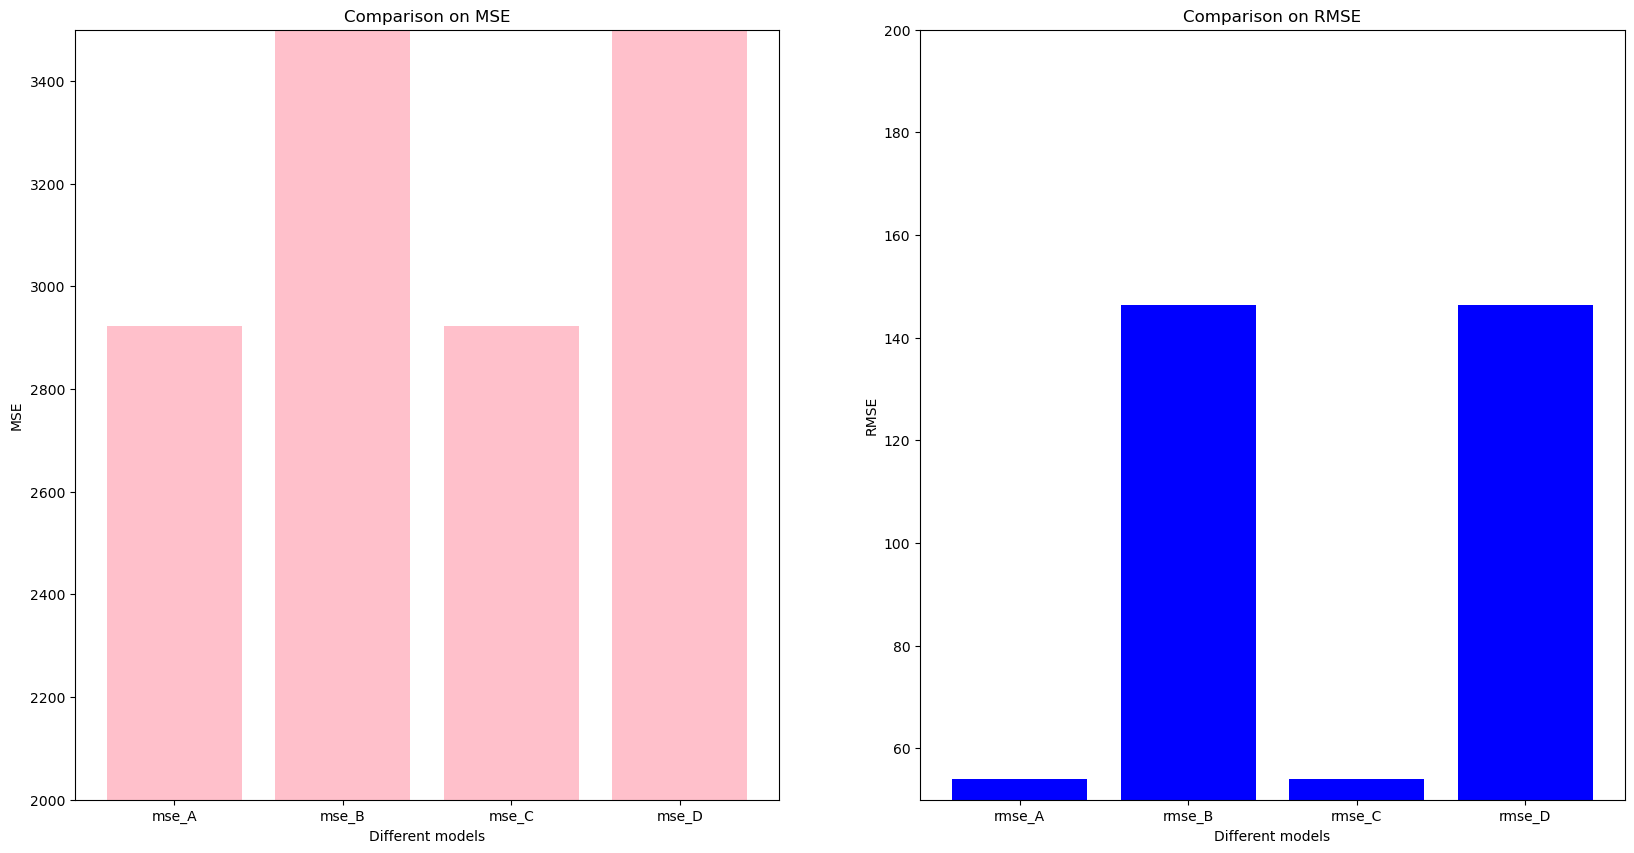

In [71]:
import matplotlib.pyplot as plt

msedf = pd.DataFrame({'mse': [mse_A, mse_B, mse_C, mse_D]}, index=['mse_A', 'mse_B', 'mse_C', 'mse_D'])
rmsedf = pd.DataFrame({'rmse': [rmse_A, rmse_B, rmse_C, rmse_D]}, index=['rmse_A', 'rmse_B', 'rmse_C', 'rmse_D'])


plt.figure(figsize=(20, 10))

# MSE chart
plt.subplot(1, 2, 1)
plt.ylabel('MSE')
plt.xlabel('Different models')
plt.ylim(2000, 3500)
plt.title("Comparison on MSE")
plt.bar(x=['mse_A', 'mse_B', 'mse_C', 'mse_D'], height=msedf['mse'], color='pink')

# RMSE chart
plt.subplot(1, 2, 2)
plt.ylabel('RMSE')
plt.xlabel('Different models')
plt.ylim(50, 200)
plt.title("Comparison on RMSE")
plt.bar(x=['rmse_A', 'rmse_B', 'rmse_C', 'rmse_D'], height=rmsedf['rmse'], color='blue')


plt.show()


# Insightful analysis
MSE B ans MSE D is greater than MSE A and MSE C is greater meaning the model with less training data yield has higher MSE, in this case that would be MSE B and D.
RMSE A, RMSE C have better RMSE while RMSE B and RMSE D has the highest RSME which is not good.
The more corelated columns as input help generate better prediction results. 